In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [104]:
crime= pd.read_csv('C:\/Users\Acer\Desktop\ML\DATA\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [105]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [106]:
crime.info()

(#no null values)

SyntaxError: incomplete input (2021905848.py, line 3)

In [107]:
scaler= MinMaxScaler()
scaled_crime= scaler.fit_transform(crime.iloc[:,1:])
scaled_crime

#(normalizing the data using minmaxscler)

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

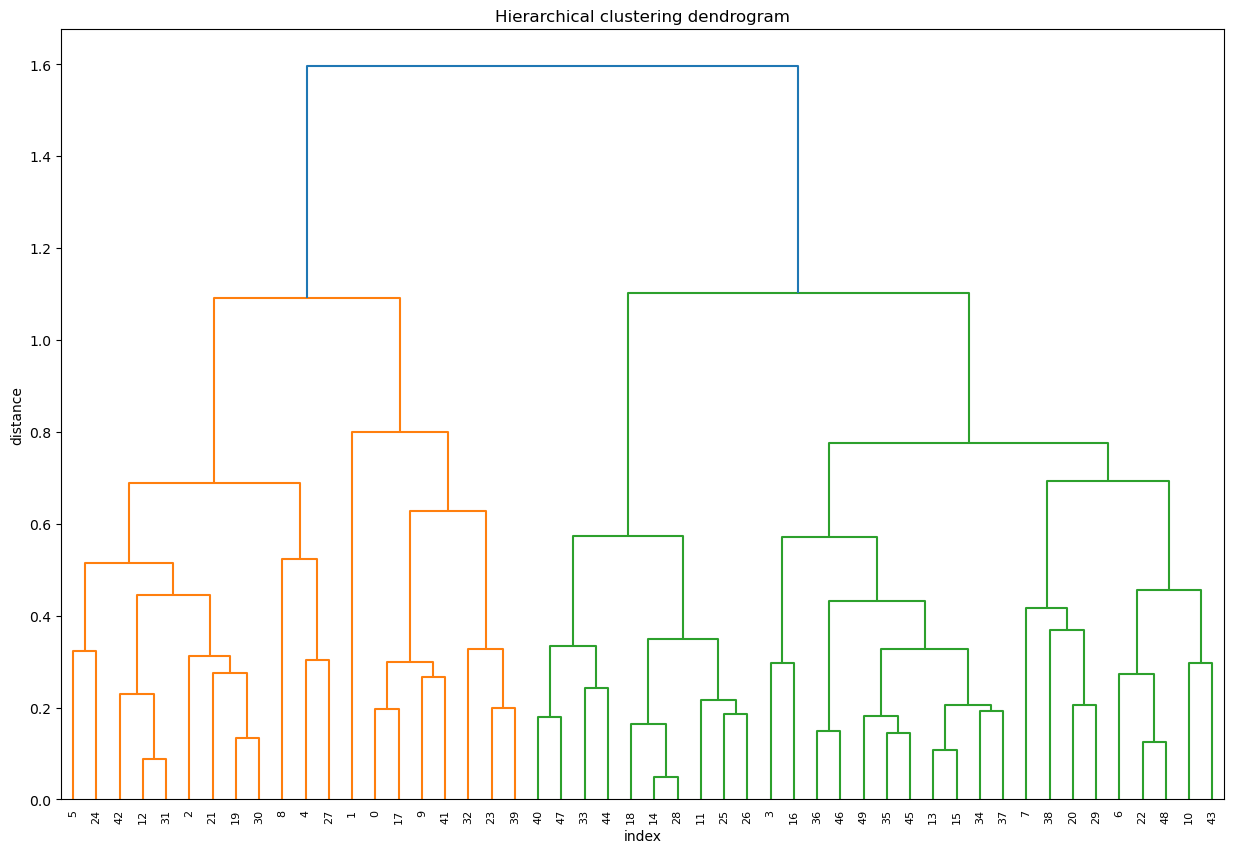

In [108]:
import scipy.cluster.hierarchy as sch
z= sch.linkage(scaled_crime, method='complete', metric='euclidean')
z

plt.figure(figsize=(15,10))
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z)
plt.show()

In [109]:
df= AgglomerativeClustering(n_clusters=7, linkage='complete', affinity='euclidean').fit(scaled_crime)
cluster_labels= pd.Series(df.labels_)
cluster_labels
crime['clust']=cluster_labels
crime

#(the output shows which data belongs to which cluster)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,6
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,1


In [110]:
#KMEANS CLUSTERING

wcss=[]
for i in range(1, 11):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
#(choosing 11 different clusters to see the point of decrese in the graph)    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'wcss')

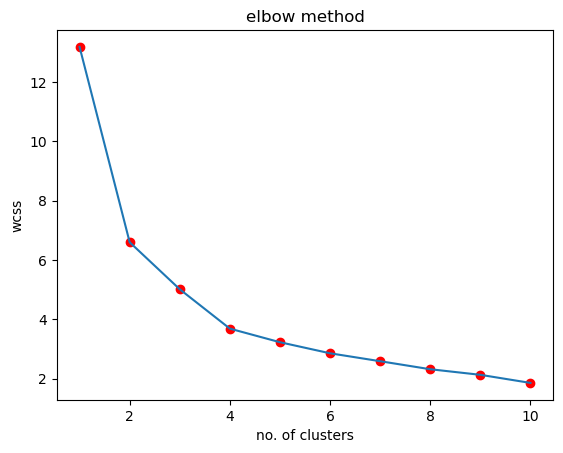

In [111]:
plt.plot(range(1,11), wcss)
plt.scatter(range(1,11), wcss,color='r')
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [112]:
cluster= KMeans(4, random_state=10)
cluster.fit(scaled_crime)

#(4 is the point of dastric decrese)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [113]:
cluster.labels_

#(clusters)

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 3, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [114]:
crime['Kclusters']= cluster.labels_

In [115]:
cluster.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [117]:
crime.groupby('Kclusters').agg(['mean']).reset_index()

C:\Users\Acer\AppData\Local\Temp\ipykernel_11068\437903400.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('Kclusters').agg(['mean']).reset_index()


,Kclusters,Murder,Assault,UrbanPop,Rape,clust
,,mean,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500,1.500000
1,1,3.600000,78.538462,52.076923,12.176923,2.384615
2,2,10.966667,264.000000,76.500000,33.608333,0.333333
3,3,5.852941,141.176471,73.647059,19.335294,4.588235


In [118]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,Kclusters
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,5,0
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,3,3
7,Delaware,5.9,238,72,15.8,6,3
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,1,0


In [123]:
#DBSCAN CLUSTER

df1= crime.drop(['Unnamed: 0'], axis=1, inplace=True)



In [124]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Murder     50 non-null     float64
 1   Assault    50 non-null     int64  
 2   UrbanPop   50 non-null     int64  
 3   Rape       50 non-null     float64
 4   clust      50 non-null     int64  
 5   Kclusters  50 non-null     int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.3 KB


In [125]:
stdscaler= StandardScaler()
x= stdscaler.fit_transform(crime.iloc[:,[0,1,2,3]])
x

#(normalizing with standardscaler)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [126]:
model= DBSCAN(eps=1.1, min_samples=3)
model.fit(x)

DBSCAN(eps=1.1, min_samples=3)

In [127]:
model.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [128]:
df2= pd.DataFrame(model.labels_, columns=['Dcluster'])
df2

,Dcluster
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,0


In [129]:
crime['Dclusters']= df2['Dcluster']

In [130]:
df2.Dcluster.value_counts()

 2    30
 0     7
 1     7
-1     6
Name: Dcluster, dtype: int64

In [131]:
crime.groupby(['Dclusters']).agg(['mean']).reset_index()

,Dclusters,Murder,Assault,UrbanPop,Rape,clust,Kclusters
,,mean,mean,mean,mean,mean,mean
0,-1,10.066667,261.333333,75.000000,36.250000,1.666667,2.166667
1,0,14.671429,251.285714,54.285714,21.685714,1.000000,0.000000
2,1,11.014286,262.571429,77.142857,28.800000,0.000000,2.000000
3,2,4.973333,112.433333,63.566667,16.356667,3.600000,2.033333


In [132]:
crime

,Murder,Assault,UrbanPop,Rape,clust,Kclusters,Dclusters
0,13.2,236,58,21.2,1,0,0
1,10.0,263,48,44.5,4,2,-1
2,8.1,294,80,31.0,0,2,1
3,8.8,190,50,19.5,5,0,2
4,9.0,276,91,40.6,0,2,-1
5,7.9,204,78,38.7,0,2,-1
6,3.3,110,77,11.1,3,3,2
7,5.9,238,72,15.8,6,3,-1
8,15.4,335,80,31.9,0,2,-1
9,17.4,211,60,25.8,1,0,0


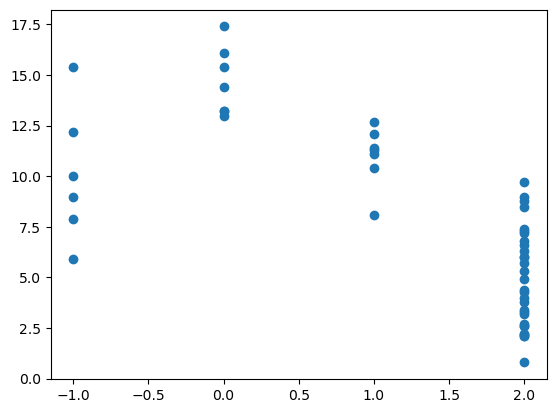

In [133]:
plt.scatter(crime['Dclusters'], crime['Murder'])